In [ ]:
# Business Performance & Revenue Analytics

This analysis evaluates revenue, profitability, customer behavior,
and regional performance to support business decision-making.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
total_revenue = df["Sales"].sum()
total_revenue


np.float64(2261536.7827)

In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")


In [6]:
df["Order Date"].isna().sum()


np.int64(5841)

In [7]:
df = df.dropna(subset=["Order Date"])


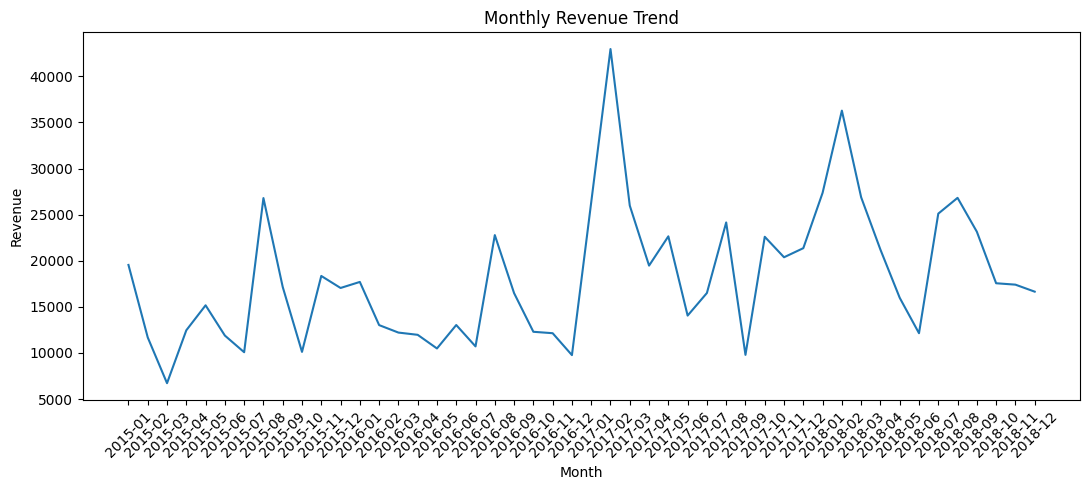

In [8]:
monthly_revenue = (
    df.groupby(df["Order Date"].dt.to_period("M"))["Sales"]
    .sum()
    .reset_index()
)

monthly_revenue["Order Date"] = monthly_revenue["Order Date"].astype(str)

plt.figure(figsize=(11,5))
plt.plot(monthly_revenue["Order Date"], monthly_revenue["Sales"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [ ]:
## Business Insights & Recommendations

• Monthly revenue analysis reveals seasonality, suggesting opportunities
  for targeted promotions during peak periods and inventory optimization
  during slower months.

• Revenue concentration across regions indicates dependence on a few key
  markets; diversification strategies could reduce business risk.

• A limited set of products and customers contributes disproportionately
  to total revenue, highlighting opportunities for focused account
  management and cross-selling.

• Data limitations (absence of cost and profit metrics) restrict margin
  analysis; integrating cost data would enable deeper profitability insights.
